<a href="https://colab.research.google.com/github/reidnclark/volatility-forecast/blob/main/mean_reversion_trading_algorithm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mean Reversion Trading Algorithm
---

# Full Code:

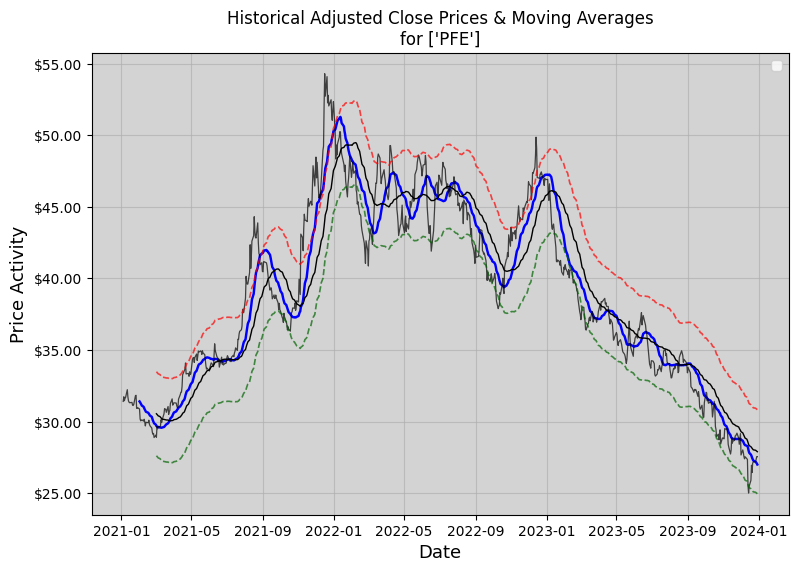

In [1522]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as formatter
import pandas as pd
import datetime
pd.set_option('display.max_rows', None)


def get_data(tickers_list: list[str], start_date: str, end_date: str) -> pd.DataFrame:
  data = yf.download(tickers_list, start=start_date, end=end_date, progress=False)
  adj_close = pd.DataFrame(data['Adj Close'])
  adj_close.index = adj_close.index.date # Voids time signature on Date index, just Date
  return adj_close


def get_moving_avg(price_data: pd.DataFrame, shorter_moving_avg_interval: int,
                   longer_moving_avg_interval: int) -> tuple:
  moving_avg_shorter = price_data.rolling(window=shorter_moving_avg_interval).mean()
  moving_avg_longer = price_data.rolling(window=longer_moving_avg_interval).mean()
  moving_avgs = pd.DataFrame(index=price_data.index)
  for ticker in price_data.columns:
        moving_avgs[f'{ticker}_shorter'] = moving_avg_shorter[ticker]
        moving_avgs[f'{ticker}_longer'] = moving_avg_longer[ticker]
  return moving_avgs, moving_avg_shorter, moving_avg_longer


def get_sdev(price_data):
  sdev = price_data.std()
  return sdev


def plot_results(moving_averages: pd.DataFrame, original_close_prices: list[float],plot_colours: list[str], plot_line_widths: list[float],
                 plot_line_styles: list[str], tickers_list: list[str], plot_figsize: tuple, sdev: pd.Series()):
  plt.figure(figsize=plot_figsize, facecolor='white')
  plt.grid(True, linestyle='-', alpha=0.7)
  plt.gca().set_facecolor('lightgrey')
  plt.title((f'Historical Adjusted Close Prices & Moving Averages\n'
             f'for {tickers_list}'))
  plt.legend()
  plt.xlabel('Date', fontsize=13)
  plt.ylabel('Price Activity', fontsize=13)
  plt.gca().yaxis.set_major_formatter(formatter.StrMethodFormatter('${x:,.2f}'))
  for i, ticker in enumerate(moving_averages.columns):
    plt.plot(moving_averages.index, moving_averages[ticker], linewidth=plot_line_widths[i], linestyle=plot_line_styles[i],
             color=plot_colours[i], label=ticker)
  plt.plot(original_close_prices.index, original_close_prices, color='black',
           linewidth=0.9, label=f'{tickers_list[0]} Adj Close Price', alpha=0.7)
  plt.plot(moving_averages.index, moving_averages['Adj Close_longer'] + (sdev/2), linewidth=1.2, color='red', linestyle='--',
           alpha = 0.7)
  plt.plot(moving_averages.index, moving_averages['Adj Close_longer'] - (sdev/2), linewidth=1.2, color='darkgreen',
           linestyle='--', alpha = 0.7)
  plt.show()


plot_colours = ['blue', 'black'] # DEFAULT INDIVIDUAL
plot_line_widths = [1.75, 1] # DEFAULT INDIVIDUAL
plot_line_styles = ['-','-'] # DEFAULT INDIVIDUAL
plot_figsize = 9,6
tickers_list = ['PFE'] # DEFAULT INDIVIDUAL
#tickers_list = ['TSMC34.SA'] # DEFAULT INDIVIDUAL
start_date = '2021-01-01' # DEFAULT
end_date = '2024-01-01' # DEFAULT
shorter_rolling_interval = 20 # DEFAULT (NUMBER OF DAYS)
longer_rolling_interval = 40 # DEFAULT (NUMBER OF DAYS)


adj_close = get_data(tickers_list, start_date, end_date)
moving_avgs, moving_avg_shorter, moving_avg_longer = get_moving_avg(adj_close, shorter_rolling_interval, longer_rolling_interval)
sdev = (get_sdev(moving_avg_longer)).iloc[0]


plot_results(moving_avgs, adj_close, plot_colours, plot_line_widths, plot_line_styles, tickers_list, plot_figsize, sdev)

In [ ]:
#adj_close
#moving_avg_shorter
#moving_avg_longer

upper_bound = moving_avg_longer + sdev
lower_bound = moving_avg_shorter - sdev

def trader(adj_close: pd.Series, moving_avg_shorter: pd.Series, moving_avg_longer: pd.Series,
           upper_bound: pd.Series, lower_bound: pd.Series):

  for i in moving_avg_shorter:

    if moving_avg_shorter <= lower_bound:

      # prepare to buy


    elif moving_

IndentationError: expected an indented block after 'if' statement on line 13 (<ipython-input-1515-71ce00663176>, line 18)

# Functions
---

Import Libraries:

In [ ]:
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.ticker as formatter

import pandas as pd
pd.set_option('display.max_rows', None)

import datetime

**Function**: Get Data

In [ ]:
def get_data(tickers_list: list[str], start_date: str, end_date: str) -> pd.DataFrame:

  # Retrieve data for adjusted close prices
  data = yf.download(tickers_list, start=start_date, end=end_date, progress=False)

  adj_close = pd.DataFrame(data['Adj Close'])
  adj_close.index = adj_close.index.date # Voids time signature on Date index, just Date

  return adj_close

**Function**: Get Moving Averages

In [ ]:
def get_moving_avg(price_data: pd.DataFrame, shorter_moving_avg_interval: int,
                   longer_moving_avg_interval: int) -> tuple:

  # Pandas rolling avg
  moving_avg_shorter = price_data.rolling(window=shorter_moving_avg_interval).mean()
  moving_avg_longer = price_data.rolling(window=longer_moving_avg_interval).mean()

  # Convert to DataFrame
  moving_avgs = pd.DataFrame(index=price_data.index)
  for ticker in price_data.columns:
        moving_avgs[f'{ticker}_shorter'] = moving_avg_shorter[ticker]
        moving_avgs[f'{ticker}_longer'] = moving_avg_longer[ticker]
  # Note: Replace Initialized (Combined) Columns with shorter and longer moving averages

  return moving_avgs, moving_avg_shorter, moving_avg_longer

**Function**: Get Sdev

In [ ]:
def get_sdev(price_data):

  sdev = price_data.std()

  return sdev

**Function**: Cycler

# Plot Results
---



In [ ]:
def trader(price_data: pd.DataFrame, sdev: int):

  sma_price = price_data['Adj Close_shorter']
  lma_price = price_data['Adj Close_longer']

  #for i in price_data:

    #if sma_price[i] and lma_price[i] == int:

      # begin trading

      #if (sma_price[i] - lma_price[i]) <= sdev:



    #else:
      #continue





**Function**:

In [ ]:
def plot_results(moving_averages: pd.DataFrame, original_close_prices: list[float],plot_colours: list[str], plot_line_widths: list[float],
                 plot_line_styles: list[str], tickers_list: list[str], plot_figsize: tuple, sdev: pd.Series()):


  plt.figure(figsize=plot_figsize, facecolor='white')
  plt.grid(True, linestyle='-', alpha=0.7)
  plt.gca().set_facecolor('lightgrey')
  # Bg color

  plt.title((f'Historical Adjusted Close Prices & Moving Averages\n'
             f'for {tickers_list}'))

  plt.legend()
  plt.xlabel('Date', fontsize=13)
  plt.ylabel('Price Activity', fontsize=13)
  plt.gca().yaxis.set_major_formatter(formatter.StrMethodFormatter('${x:,.2f}'))
  # Sets ($) data format

  for i, ticker in enumerate(moving_averages.columns):
    plt.plot(moving_averages.index, moving_averages[ticker], linewidth=plot_line_widths[i], linestyle=plot_line_styles[i],
             color=plot_colours[i], label=ticker)
  # Note: Loops through plot formatting in following code block (Input: Format Plot)

  # Note: Plot Original Price Data Always as Black w/ its own other style attributes
  # Change this terrible line later
  plt.plot(original_close_prices.index, original_close_prices, color='black',
           linewidth=0.9, label=f'{tickers_list[0]} Adj Close Price')

  # Plot sdev lines
  plt.plot(moving_averages.index, moving_averages['Adj Close_longer'] + sdev, linewidth=0.7)
  plt.plot(moving_averages.index, moving_averages['Adj Close_longer'] - sdev)


  plt.show()

# Inputs

---
**Inputs**: Format Plot

In [ ]:
#plot_colours = ['blue', 'blue', 'darkred', 'darkred'] # DEFAULT
plot_colours = ['blue', 'red'] # DEFAULT INDIVIDUAL
#plot_line_widths = [1,0.4,1,0.4] # DEFAULT
plot_line_widths = [1, 0.7] # DEFAULT INDIVIDUAL
#plot_line_styles = ['-','-.','-','-.'] # DEFAULT
plot_line_styles = ['-','--'] # DEFAULT INDIVIDUAL
plot_figsize = 9,6

**Inputs**: Portfolio Tickers, Date Period, Moving Average Rolling Intervals

In [ ]:
#tickers_list = ['MSFT', 'AAPL'] # DEFAULT
tickers_list = ['MSFT'] # DEFAULT INDIVIDUAL
start_date = '2023-01-01' # DEFAULT
end_date = '2024-01-01' # DEFAULT
shorter_rolling_interval = 5 # DEFAULT (NUMBER OF DAYS)
longer_rolling_interval = 15 # DEFAULT (NUMBER OF DAYS)

Store Function Output

In [ ]:
## Function: Get Data
adj_close = get_data(tickers_list, start_date, end_date)

## Function: Get Moving Averages (uses normalized adj close result)
moving_avgs, moving_avg_shorter, moving_avg_longer = get_moving_avg(adj_close, shorter_rolling_interval, longer_rolling_interval)

## Function: Get Sdev
sdev = (get_sdev(moving_avg_longer)).iloc[0]

print(sdev)

# Output:
---

**Return Results:**

In [ ]:
#plot_results(adj_close, plot_colours, plot_line_widths, plot_line_styles, tickers_list)


#plot_results(moving_avgs, adj_close, plot_colours, plot_line_widths, plot_line_styles, tickers_list, plot_figsize, sdev)

# Analysis

---
**Function**: Get Rolling Sdev



In [ ]:
def get_sdev(price_data):

  sdev = price_data.std()

  return sdev

sdev = (get_sdev(adj_close)).iloc[0]

print(sdev)

---
**Function**: Check if Current Price +/2 sdev about the mean